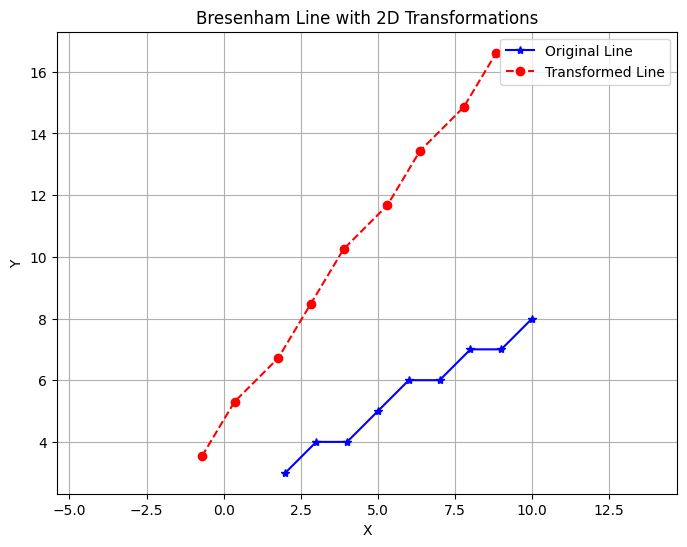

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def bresenham_line(x0 , y0 , x1 , y1):
    xes , yes = [], []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x1 >= x0 else -1
    sy = 1 if y1 >= y0 else -1
    x, y = x0 , y0
    
    if dx >= dy:
        p = 2 * dy - dx
        for _ in range(dx + 1):
            xes.append(x)
            yes.append(y)
            x += sx
            if p >= 0:
                y += sy
                p += 2 * dy - 2 * dx
            else:
                p += 2 * dy
    else:
        p = 2 * dx - dy
        for _ in range(dy + 1):
            xes.append(x)
            yes.append(y)
            y += sy
            if p >= 0:
                x += sx
                p += 2 * dx - 2 * dy
            else:
                p += 2 * dx
    
    return np.array(xes), np.array(yes)


def apply_2d_transformation(x_coords, y_coords, transformation_matrix):
    points = np.vstack([x_coords, y_coords, np.ones_like(x_coords)])
    transformed_points = transformation_matrix @ points
    return transformed_points[0], transformed_points[1]

def plot_line_with_transformations(x0, y0, x1, y1):
    
    x_orig , y_orig = bresenham_line(x0, y0, x1, y1)
    
    
    xf, yf = x0, y0
    scaling_matrix = np.array([
        [2, 0, 0],
        [0, 0.5, 0],
        [0, 0, 1]
    ])
    T_to_origin = np.array([[1, 0, -xf], [0, 1, -yf], [0, 0, 1]])
    T_back = np.array([[1, 0, xf], [0, 1, yf], [0, 0, 1]])
    composite_matrix = T_back @ scaling_matrix @ T_to_origin
    
    
    theta = np.pi / 4  
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    
    composite_matrix = rotation_matrix @ composite_matrix
    
    
    x_transformed , y_transformed = apply_2d_transformation(
        x_orig , y_orig , composite_matrix)
    
    
    plt.figure(figsize =(8, 6))
    plt.plot(x_orig, y_orig, marker='*', color='blue',
             linestyle='-', label='Original Line')
    plt.plot(x_transformed, y_transformed, marker='o',
             color='red', linestyle='--', label='Transformed Line')
    
    plt.title("Bresenham Line with 2D Transformations")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


plot_line_with_transformations(2, 3, 10, 8)


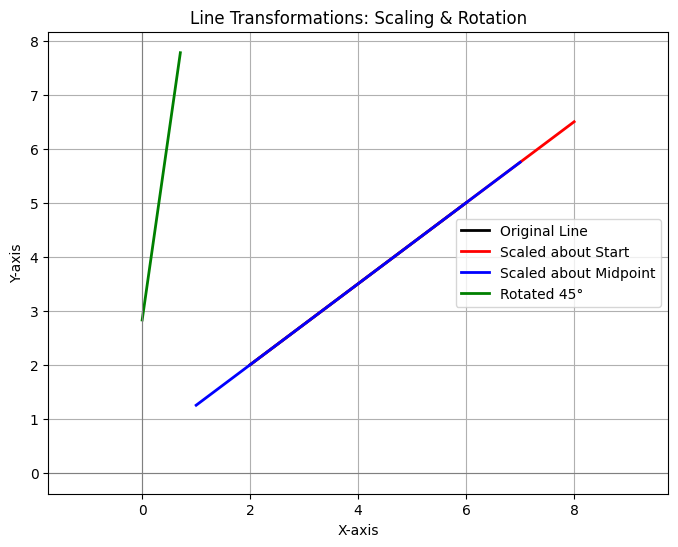

In [19]:
import matplotlib.pyplot as plt
import numpy as np


x1, y1 = 2, 2
x2, y2 = 6, 5


plt.figure(figsize=(8,6))
plt.plot([x1, x2], [y1, y2], 'k', label="Original Line", linewidth=2)

# --- Task 1: Scale about starting point ---
sx, sy = 1.5, 1.5  

x1_sp, y1_sp = x1, y1  
x2_sp = x1_sp + sx * (x2 - x1_sp)
y2_sp = y1_sp + sy * (y2 - y1_sp)

plt.plot([x1_sp, x2_sp], [y1_sp, y2_sp], 'r', label="Scaled about Start", linewidth=2)

# --- Task 2: Scale about midpoint ---
xm = (x1 + x2)/2
ym = (y1 + y2)/2

x1_mp = xm + sx * (x1 - xm)
y1_mp = ym + sy * (y1 - ym)
x2_mp = xm + sx * (x2 - xm)
y2_mp = ym + sy * (y2 - ym)

plt.plot([x1_mp, x2_mp], [y1_mp, y2_mp], 'b', label="Scaled about Midpoint", linewidth=2)

# --- Task 3: Rotate about origin ---
theta = 45  
rad = np.radians(theta)

def rotate(x, y, rad):
    x_new = x * np.cos(rad) - y * np.sin(rad)
    y_new = x * np.sin(rad) + y * np.cos(rad)
    return x_new, y_new

x1_rot, y1_rot = rotate(x1, y1, rad)
x2_rot, y2_rot = rotate(x2, y2, rad)

plt.plot([x1_rot, x2_rot], [y1_rot, y2_rot], 'g', label=f'Rotated {theta}°', linewidth=2)


plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.grid(True)
plt.legend()
plt.title("Line Transformations: Scaling & Rotation")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')  
plt.show()
